## Redes sociais - APS 3

Diogo Duarte, Pedro Dannecker e Gabriel de Araújo Alves

### Importando bibliotecas

In [1]:
import pandas as pd
import csv
from graph_tool import Graph
import os
from graph_tool import util
# from netpixi.data.gt import *
# import netpixi
import netpixi

from netpixi.integration.gt import *

### Inicializando o Dataframe

In [2]:
df = pd.read_csv('deezer_europe_edges.csv')
df.head()

<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()


,node_1,node_2
0,0,14270
1,0,16976
2,0,12029
3,0,3001
4,0,14581


### Criando a lista de nós

In [3]:
lista_nos = []
i = 0
while i <= 28280:
    lista_nos.append(i)
    i += 1


### Criando o grafo

In [4]:
g = Graph(directed=False)

### Adicionando os nós

In [5]:
for person in lista_nos:
    g.add_vertex(person)

### Adicionando as arestas

In [6]:
list_node1 = list(df['node_1'])
list_node2 = list(df['node_2'])

In [7]:
for l1, l2 in zip(list_node1, list_node2):
     g.add_edge(l1,l2)

### Análise Exploratória

#### A) Número de vértices, número de arestas, densidade

In [8]:
# Número de vértices
n = g.num_vertices()
print('O número de vértices é {0}'.format(n))


O número de vértices é 28281


In [9]:
# Número de arestas
m = g.num_edges()
print('O número de arestas é {0}'.format(m))

O número de arestas é 92752


In [10]:
# Densidade
if g.is_directed():
    max_edges = n * (n - 1)
else:
    max_edges = n * (n - 1) // 2

d = m / max_edges
print('A densidade é {0}'.format(round(d,4)))

A densidade é 0.0002


#### B) Estatísticas e histograma do degree. (não é necessário in-degree e out-degree)

In [11]:
data_targets = pd.DataFrame({k: list(v) for k, v in g.vp.items()})
data_targets

,id
0,0
1,1
2,2
3,3
4,4
...,...
28276,28276
28277,28277
28278,28278
28279,28279


In [12]:
degrees = []
for v in g.all_vertices():
    degrees.append(v.total_degree())

data_targets['degree'] = degrees
data_targets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28281 entries, 0 to 28280
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      28281 non-null  int64
 1   degree  28281 non-null  int64
dtypes: int64(2)
memory usage: 442.0 KB


<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()


count    28281.000000
mean         6.559315
std          7.946138
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max        172.000000
Name: degree, dtype: float64

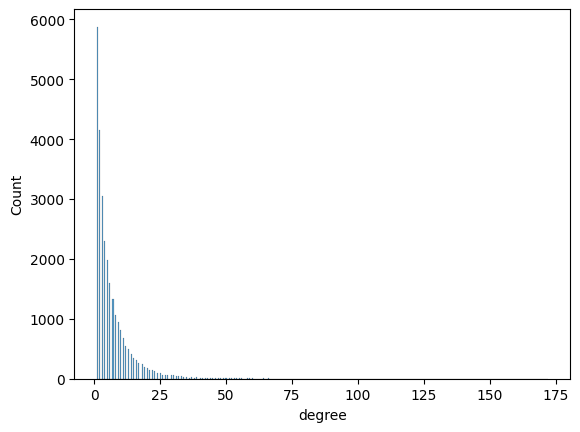

In [13]:
import seaborn as sns
sns.histplot(data_targets['degree'])
data_targets['degree'].describe()

### Análise Visual do Grafo

#### A) Salvando o arquivo

#### B) Visualizando o grafo

In [33]:
g= gt_load('../notebooks/Deezer.net.gz')
var = gt_draw.sfdp_layout(g)
g = gt_clean(g)
gt_move(g, var)
gt_save(g, 'Deezer.net.gz')
r=netpixi.render('Deezer.net.gz',infinite=True);

#### C) Ajustando as propriedades visuais do grafo

In [37]:
# mudar a cor de fundo do grafo
r.graph(color=0xdddddd)

# mudar a cor e o tamanho dos vértices
r.vertex_default(color=0xcccccc, size=15)

# mudar a cor, a espessura e a curvatura das arestas
r.edge_default(color=0x000000, width=3, curve1=2, curve2=2)